# Multi-linear and polynomial regression

For this homework you are going to create a data pipeline for multi-linear and polynomial regression and compare the results. You will be using the data Airquality dataset from UCI Machine Learning Repository found [here](http://archive.ics.uci.edu/ml/datasets/Air+Quality) to predict the Nitrogen Oxide (NOx(GT)) levels.  Pay attention to what -200 means when you clean the data.

In this homework you will perform the steps required for data exploration and for the last question you will create a data pipeline that will perform all of the these steps.

## 0) Import the required packages, check the data types and number of non-null values for each column

When importing the data you may want to use the "decimal" parameter from read_csv

In [296]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
%matplotlib inline

import statsmodels.api as sm
#This will prevent the warnings from showing when you run your code :
import warnings
warnings.filterwarnings('ignore')

In [297]:
#Import the data :
df = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',')

# Imported the data with the decimal = ','
# Displaying that all the Objects except for time are float
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [298]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


<AxesSubplot:>

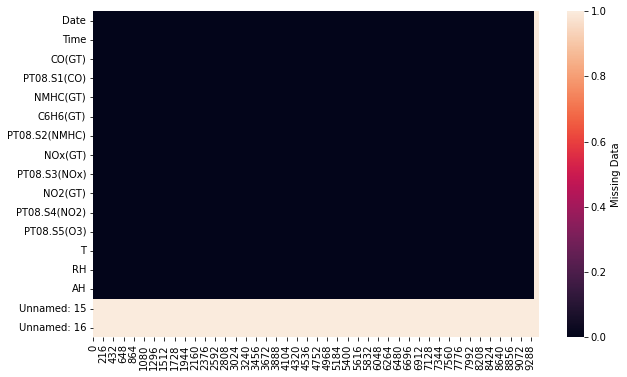

In [299]:
# Displaying the location of all current NaNs
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cbar_kws={'label': 'Missing Data'})

In [300]:
#Check if we have any null values :
df.isnull().values.any()

True

In [301]:
# Dropping Rows that consist of all NA's
df.dropna(axis=0, how='all', inplace=True)

# Dropping Columns that consist of all NA's
df.dropna(axis=1, how='all', inplace=True)

df.shape

(9357, 15)

In [302]:
# Confirming that all NA's have been removed:
df.isnull().values.any()

False

## 1) Data cleaning. Drop any unnecessary columns and NaN values from the data. 

## Check that the data that is in the columns are valid inputs. Make the invalid inputs NaNs and remove any columns with a majority of NaN values then replace the values left with the median value for that column.  The Italians use 3,6 to represent the decimal value 3.6 so replace all them comma's with decimal and convert to float.


In [303]:
# Note that the comma versus decimal problem was taken care of during the import of the CSV above.
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [304]:
# Replacing all the -200 values with NaN
df = df.replace(-200, np.nan)
df


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [305]:
# Confirming that there are now NaN's
df.isnull().values.any()

True

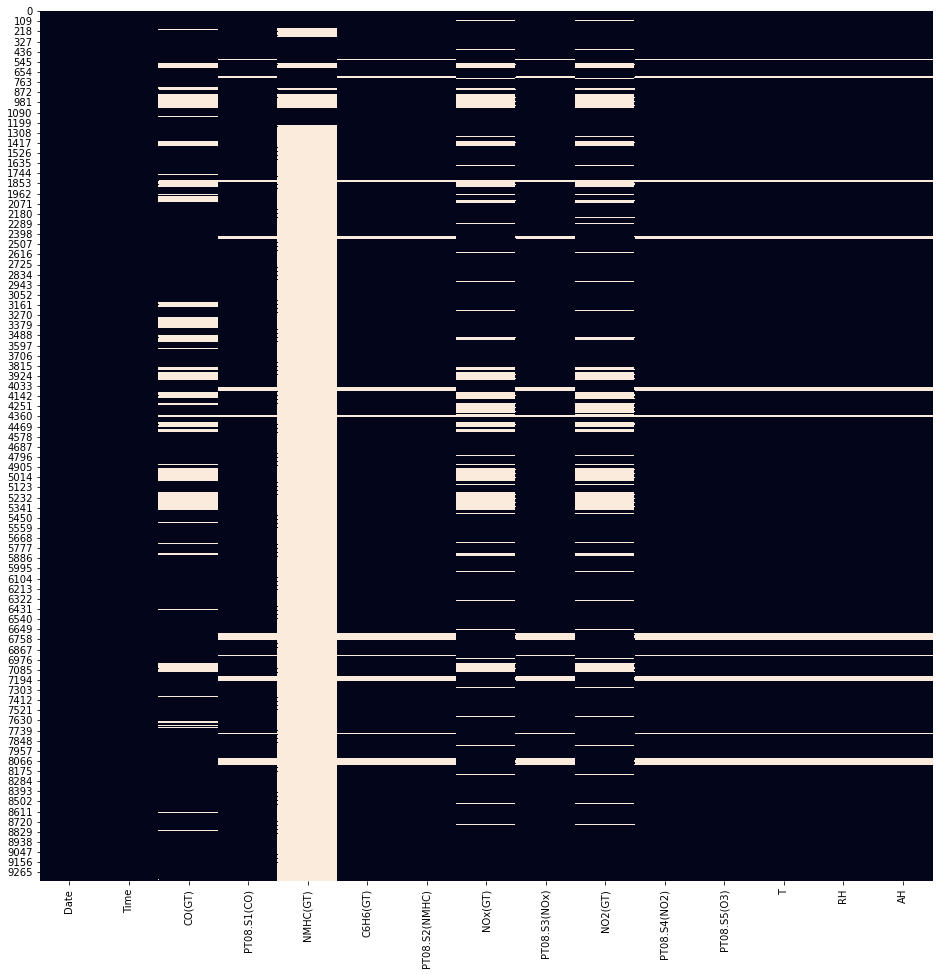

In [306]:
# Displaying Heat map so that you can see the NaN Values
plt.figure(figsize=(16,16))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [307]:
# Looping through the columns to display the percentage that are NaN
print("Percentage of Row that has Nan")
for row in df:
    print(row, round(df[row].isna().sum()/len(df[row])*100,2),"%")

Percentage of Row that has Nan
Date 0.0 %
Time 0.0 %
CO(GT) 17.99 %
PT08.S1(CO) 3.91 %
NMHC(GT) 90.23 %
C6H6(GT) 3.91 %
PT08.S2(NMHC) 3.91 %
NOx(GT) 17.52 %
PT08.S3(NOx) 3.91 %
NO2(GT) 17.55 %
PT08.S4(NO2) 3.91 %
PT08.S5(O3) 3.91 %
T 3.91 %
RH 3.91 %
AH 3.91 %


In [308]:
# Dropping Columns that are primarily made up from NaN's
# For this Purpose we're going to say that over 50% qualifies as primarily
# Dropping the Date Time columns because they should not be used
df.drop(columns=['NMHC(GT)','Time', 'Date'], axis=1, inplace=True)
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [309]:
# Showing the Columns with Nans
df.isna().sum()

CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [310]:
# Replacing the NaN's with the median of the column
for column in df.loc[:, df.columns != 'Time']:
    df[column].fillna(df[column].median(), inplace=True)
df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [311]:
# Confirming that all NA's have been removed:
df.isnull().values.any()

False

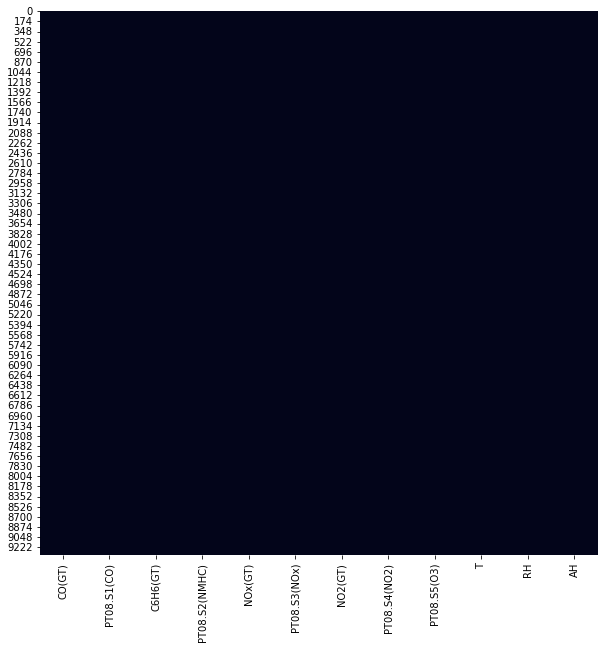

In [312]:
# Displaying that the NaN's have been removed
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## 2) Check the assumptions for a multi-linear model regression. 

### a) Check strong correlation among independent variables (correlation greater than 0.8). If strong correlation exists between variables, remove one of them from the data.

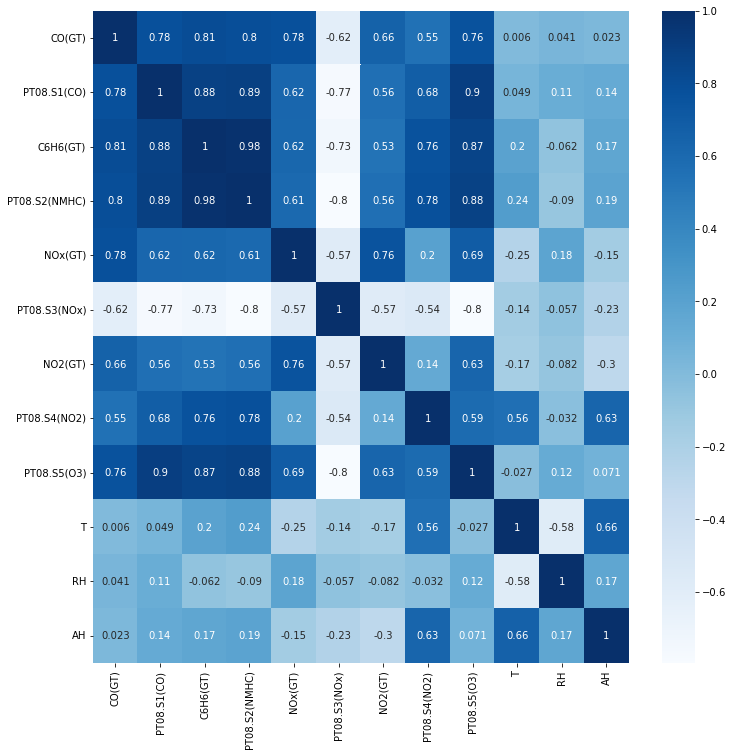

In [313]:
# Displaing a correlation heatmap to identify which variables have correlations that are greater than 0.8
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

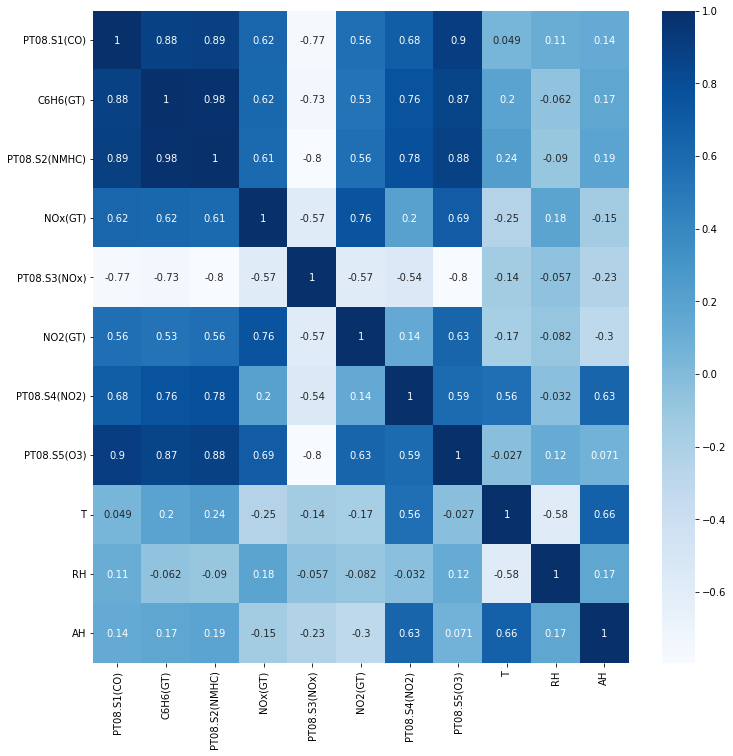

In [314]:
# Removing 'CO(GT)' Because it has a correlation of .81 with C6H6(GT)
df.drop(columns=['CO(GT)'], axis=1, inplace=True)
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()


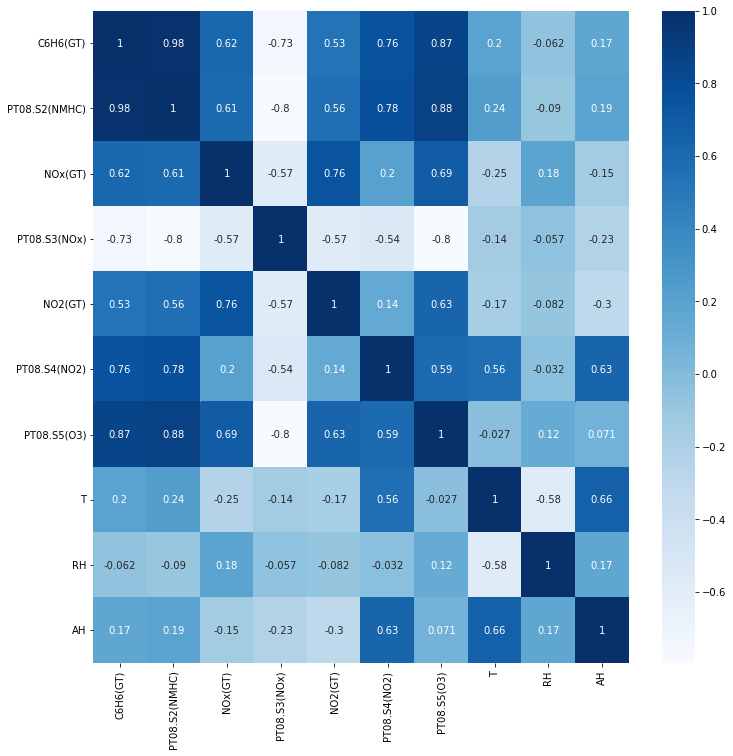

In [315]:
# Removing PT08.S1(CO) Because it has a corlation of 0.89 w/ PT08.S2(NMHC)
df.drop(columns=['PT08.S1(CO)'], axis=1, inplace=True)
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

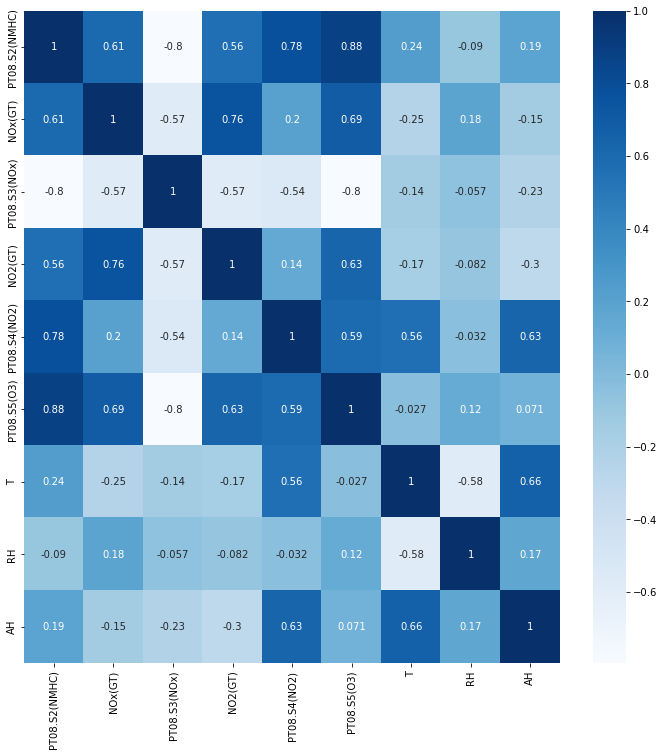

In [316]:
# Removing C6G6(GT) Because it has a correlation of .98 w/ PT08.S5(NMHC)
df.drop(columns=['C6H6(GT)'], axis=1, inplace=True)
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

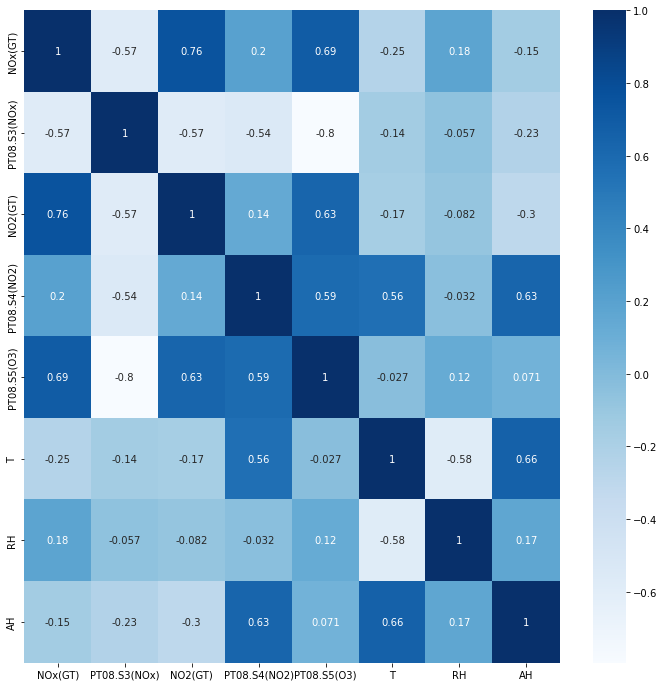

In [317]:
# Removing PT08.S2(NMHC) Because it has a correlation of .88 w/ PT08.S5(O3)
df.drop(columns=['PT08.S2(NMHC)'], axis=1, inplace=True)
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

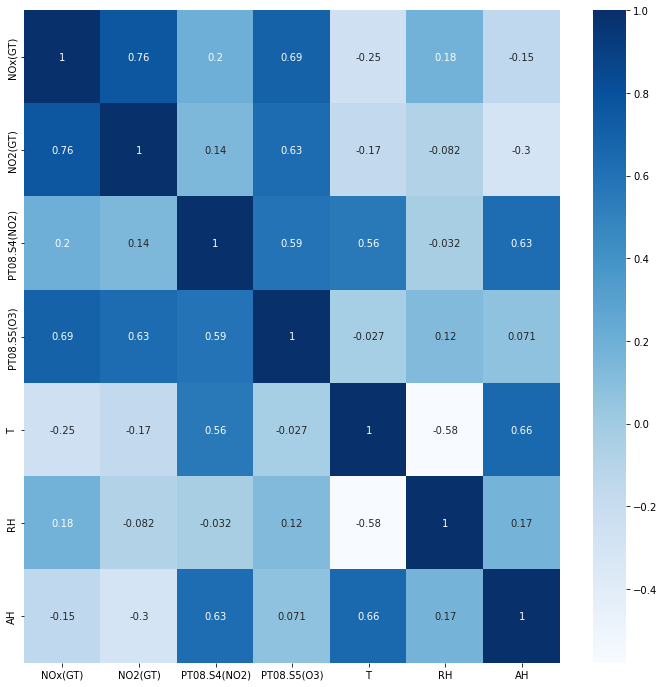

In [318]:
# Removing PT08.S5(O3) Because it has a correlation of -.8 w/ PT08.S5(O3)
df.drop(columns=['PT08.S3(NOx)'], axis=1, inplace=True)
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

### b) Check that the relationships between the independent variables left are quasi-linear with the outcome variable. Drop variables that don't satisfy the criteria

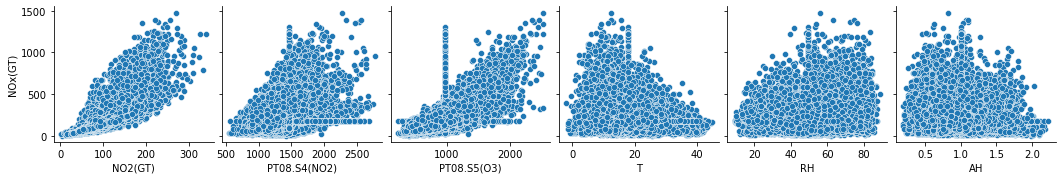

In [319]:
# Checking that the remaining independent variables left are quasi-linear with the out comevariable
sns.pairplot(data=df,y_vars=['NOx(GT)'], x_vars=['NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T','RH','AH'])
plt.show()


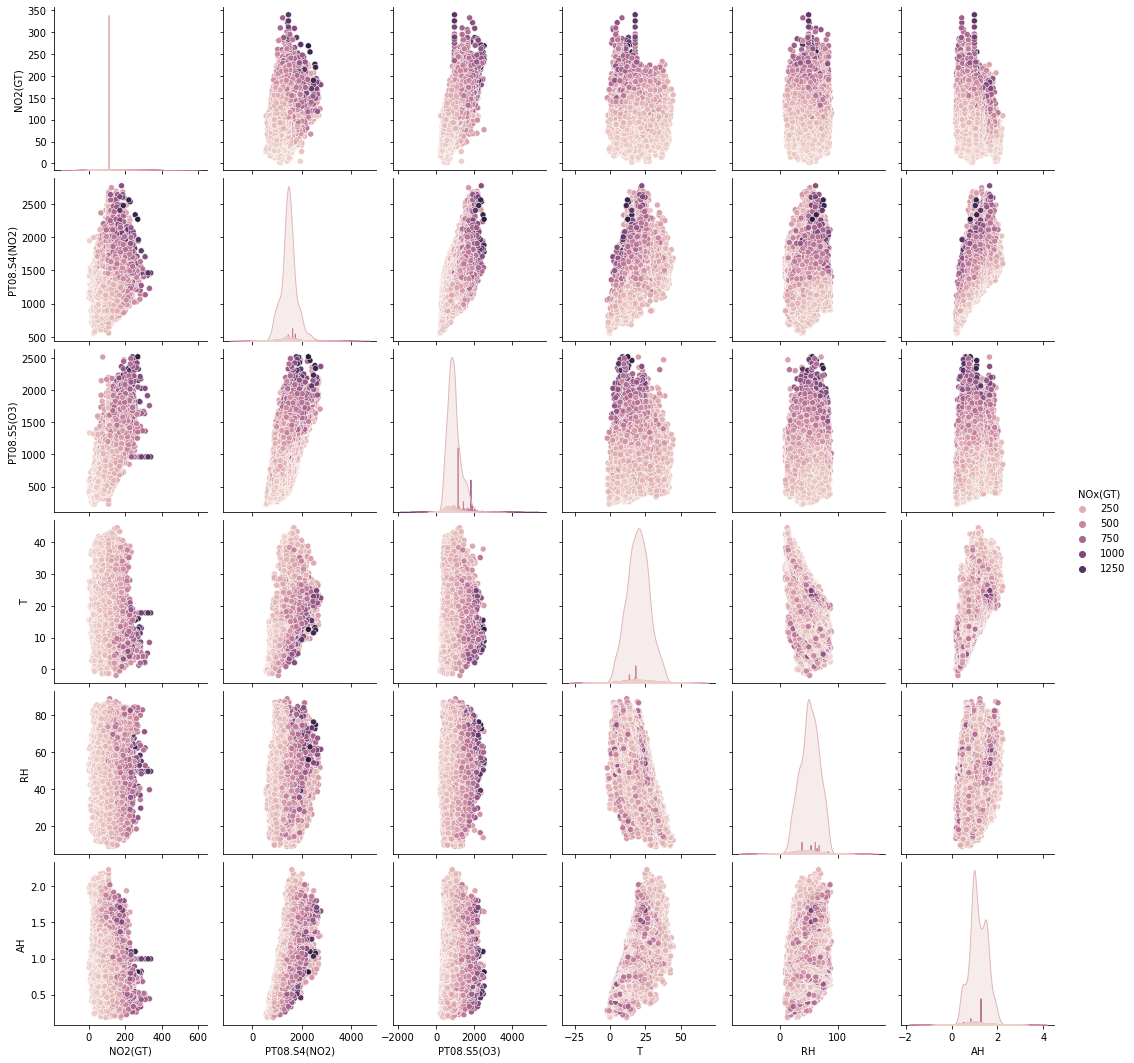

In [321]:
# Displaying a Pairplot to test the linearity of the columns
sns.pairplot(df, hue='NOx(GT)')

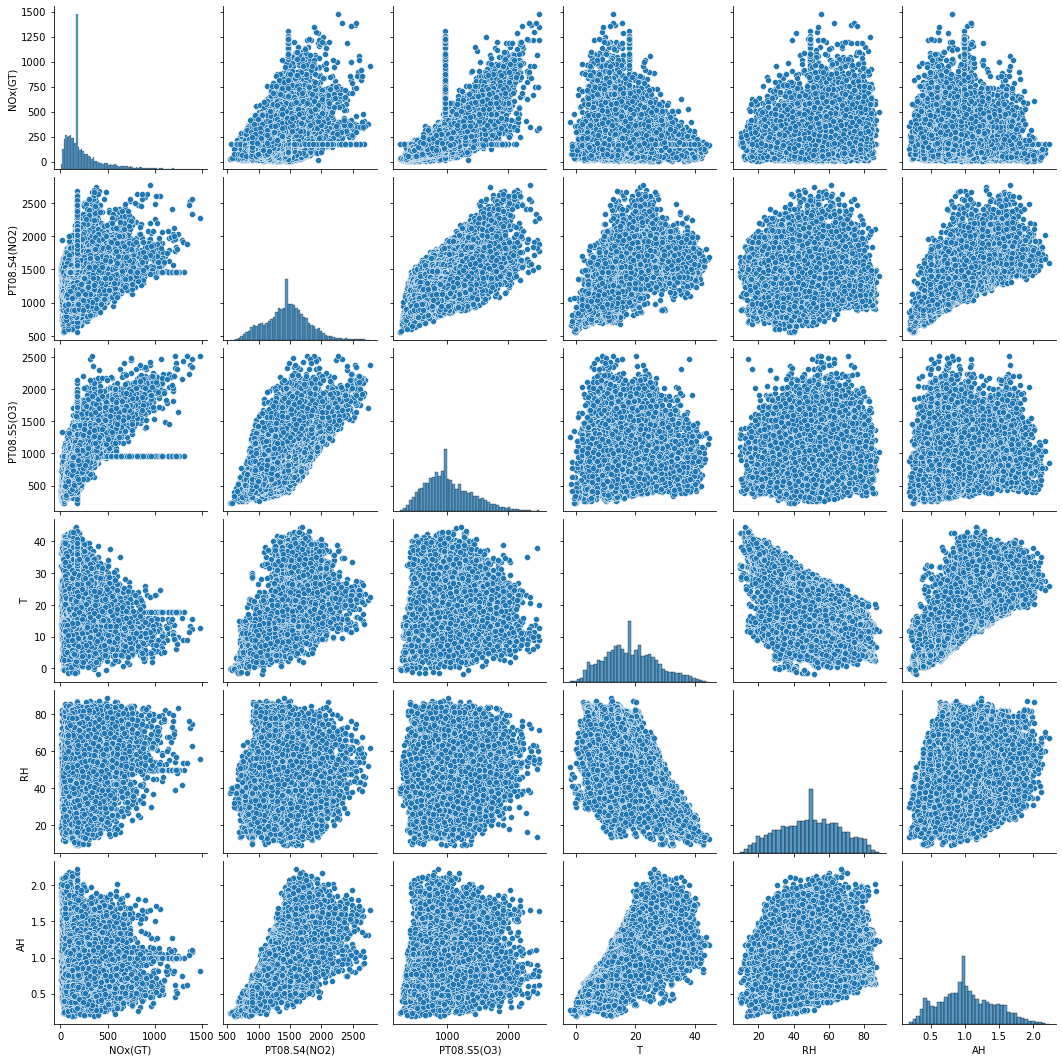

In [324]:
# There is nothing that seems to out of place. we can clearly see where we filled in the values with the medians.
# Those could be possible columns to remove
sns.pairplot(df.loc[:, df.columns != 'NO2(GT)'])

## 3) Now that you have selected your independent variables, split the data into 70-30 train test split. 

## Scale the train and test data using RobustScaler and fit a linear model onto the data. 

## Report the values of the intercept,  coefficients and the accurary of the model

In [322]:
#You may use the adjustedR2 function we used in class :
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

# Create a dataframe to store all of our metrics for the models
evaluation = pd.DataFrame({'Model': [],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

## 4) Calculate the root mean squared error (RMSE), R-squared (training), Adjusted R-squared (training), R-squared (test), Adjusted R-squared (test). Add these result to the evaluation dataframe.

## 5) Verify that the errors are normal using a histogram plot

## 6) Repeat this process for a naive model with all the variables (after the preprocessing was done, data frame you had at the end of question 1). Add the results to the evaluation dataframe.

### Why is there such a difference between the models ? Is our model wrong ?

## 7) Fit a polynomial regression model of degree 2 on the selected features. Calculate th RMSE, R-Squared training and R-squared test scores to the evaluation dataframe.

### Which model is best ? Based on which metric(s) ?

## 8) Implement a preprocessing pipeline (replacing NaN values, removing columns, scaling features, etc...) and a regression pipeline. Then combine the two into a single pipeline. Implement only for the linear regression.